<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_1_1_graficos_simulados_PM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as mt
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
from google.colab import files
import csv


# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 4 # 2.4
pi = 3.1416
#---------------------------Driving voltage ------------------------------------
#----------PM --------- Potências de entrada em dBm nas portas dos moduladores
Ppm1     = 28.91   ;  Apm1  = pi*10**((Ppm1-10)/20)/Vpi_pm1     ;   Vpm1   =  Vpi_pm1*Apm1/pi   ; ang1pm = 0   ;  Upm1   =  0       ;     Tpm1  =  (pi*Upm1/Vpi_pm1);
#---------MZM --------
Pmz1a    = 22.3  ;  Amz1a   = pi*10**((Pmz1a-10)/20)/Vpi_mz1  ;   V1a   =  Vpi_mz1*Amz1a/pi   ;  ang1a  = 0  ;  Umz1a  = Vpi_mz1/2 ;    Th1a  =  (pi*Umz1a/Vpi_mz1);
Pmz1b    = 23.9  ;   Amz1b   = pi*10**((Pmz1b-10)/20)/Vpi_mz1 ;   V1b   =  Vpi_mz1*Amz1b/pi   ;  ang1b  = 0  ;  Umz1b  =  0;            Th1b  =  (pi*Umz1b/Vpi_mz1);


up_n  =  45   # number of generated SLs for PM
# up_m  =  61   # number of generated SLs for MZ

noise = 10**-7; noise_dBm = 10*log10(noise)



In [ ]:
#===============================================================================
#--------------------------- Preenchimento do vector PM
top_n = int((up_n-1)/2)
ind_n = range(-top_n,top_n+1)

def pm_e_vector(ind_n, Apm1):
 vector_pm = []
 for n in ind_n:
   J_n_Apm = besselj(n,Apm1)
   vector_pm.append(J_n_Apm)

 return vector_pm

#------------function calculate Intensity and add noise----------------
#  Usa um vetor de campo elétrico e calcula E.^2 e adiciona ruido
def find_Iout_add_noise(up_vec, Vector_efield_all, noise):
 temp2 = [abs(k2) for k2 in Vector_efield_all]
 Vector_Iout_all = np.square(temp2)
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))

 return ax_vector_comb,Comb_plot,Comb_plot_dBm


def ploting_sl2(axrange,namex, comb_dBm, sistem, lim_sup, lim_lat):
    # Cria uma figura e um eixo para o gráfico
    fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)


    # Cria o gráfico stem
    ax.stem(axrange,comb_dBm,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo')  #magenta red blue kiwi


    # Define o título do gráfico com o valor da variável sistem
    #ax.set_title('Resposta do '+sistem+' em dB', pad=14)

    tam_let  = 18
    # Define os rótulos dos eixos
    ax.set_xlabel('$'+namex+'$', fontsize=tam_let)
    ax.set_ylabel('$10 log(I_{'+sistem+'}/I_{IN})$ (dB)', fontsize=tam_let)
    #ax.set_ylabel('Potência (dBm)', fontsize=tam_let)
    ax.tick_params(axis='both', which='major', labelsize=tam_let)
    ax.grid(True, linestyle='--') # Define as linhas do grid como puntilhadas

    '''
    # Criando um segundo conjunto de eixos que compartilha o mesmo eixo x
    ax2 = ax.twinx()
    # Plotando os dados no eixo secundário
    ax2.set_ylabel('Potência (dBm)', fontsize=tam_let, color='r')
    # Configurando a cor do eixo y para corresponder à cor dos dados
    ax2.tick_params(axis='y', labelcolor='r',which='major', labelsize=tam_let)
    ax2.set_ylim(-72, lim_sup)
    ax2.set_yticks(range(-70, lim_sup+1, 10))
    '''

    ax.set_ylim(-72, lim_sup)
    ax.set_xlim(-lim_lat-0.5, lim_lat + 0.5)
    ax.set_yticks(range(-70, lim_sup+1, 10))

    # Exibe o gráfico
    plt.show()

# analise de SD e AV

def analise_SD_AV(vec_SL, eN):
  up_x = len(vec_SL)  #up_m  Tamanho do Vetor gerado por MSL
  print('Tamanho do vector de saida do EOM :', up_x)
  #Quantidade de SLs avaliadas
  print('eN =', eN)
  ia = int((up_x - eN-2)/2+1)
  ib = int((up_x + eN-2)/2+1)

  #print('Faixa entre inicio e final ia=',ia, 'ib=',ib)
  # Encontramos o vetor central a ser avaliado
  v_analyze = []
  for k in range(ia,ib):
    v_analyze.append(vec_SL[k])

   #print('Fator de variação SLs avaliadas   --:', np.std(v_analyze)/np.mean(v_analyze))
  #print('STD: ', np.std(v_analyze),' Média ',np.mean(v_analyze))
  menor = min(v_analyze)
  men_dB = 10*log10(menor)
  maior = max(v_analyze)
  mai_dB = 10*log10(maior)
  dif  = maior - menor
  dif_dB_1  = mai_dB - men_dB
  # Desvio padrão das SLs avaliadas
  print('SD =', round(np.std(v_analyze), 5))
  #Diferença entre mai e men (dB)
  print('AV =', round(dif_dB_1, 5))
  print('CV =', round(100*np.std(v_analyze)/np.mean(v_analyze),5))

  #PLOTS
  '''
  plt.stem(vec_mz)
  plt.show()
  #plt.stem(Imz_Iin_dBm)
  #plt.show()
  plt.stem(v_analyze)
  plt.show()
  '''
  #plt.stem(v_analyze)
  #plt.show()

# Figura 3.10 (a)

<ipython-input-207-3a9565035b53>:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


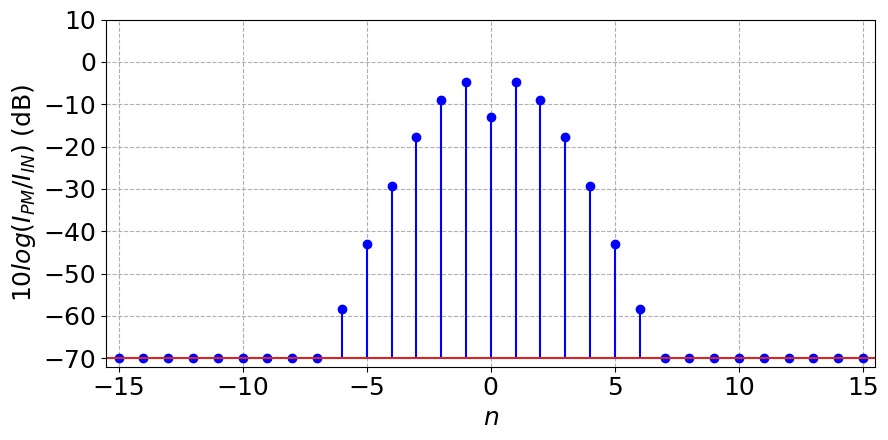

Amz1a and Amz1b 3.236613914990431 and 3.8912657985808217


In [ ]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector
ind1_pm = ind_n    # comprimento do vetor para usar no pm
A1pm   = 2
(vector1_pm) = pm_e_vector(ind1_pm, A1pm)

(ax_pm,comb_pm1,comb_pm_dBm1) = find_Iout_add_noise(up_n, vector1_pm, noise)
sistem1  = ' PM '
name_x   = 'n'
sup_pm  = 10
lat_pm  = 15
ploting_sl2(ax_pm, name_x, comb_pm_dBm1,sistem1, sup_pm, lat_pm)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)


In [ ]:
# Pente do PM a ser analisado
vec_SL = comb_pm1  # Vetor de intensidade em mW
eN     = 3          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)


Tamanho do vector de saida do EOM : 45
eN = 3
SD = 0.13316
AV = 8.21865
CV = 55.84585


# Figura 3.10 (b)

<ipython-input-207-3a9565035b53>:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


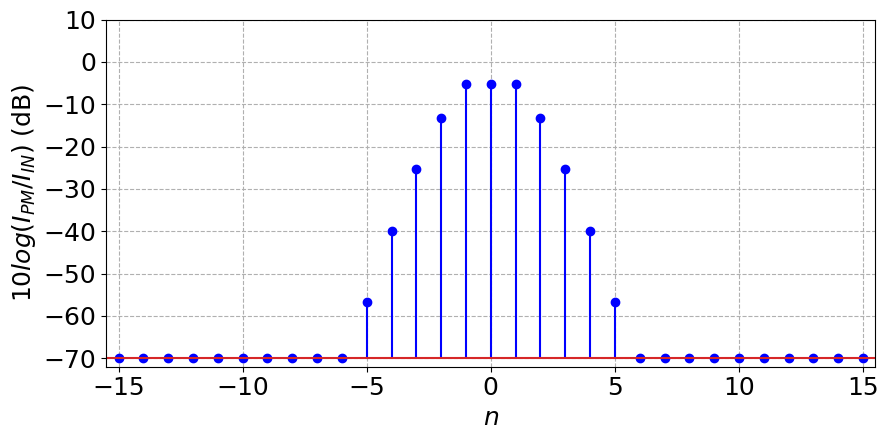

Amz1a and Amz1b 3.236613914990431 and 3.8912657985808217


In [ ]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector
ind2_pm = ind_n    # comprimento do vetor para usar no pm
A2pm   = 1.44

(vector2_pm) = pm_e_vector(ind2_pm, A2pm)

(ax_pm,comb_pm2,comb_pm_dBm2) = find_Iout_add_noise(up_n, vector2_pm, noise)
sistem1  = ' PM '
name_x   = 'n'
sup_pm  = 10
lat_pm  = 15
ploting_sl2(ax_pm, name_x, comb_pm_dBm2,sistem1, sup_pm, lat_pm)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

In [ ]:
# Pente do PM a ser analisado
vec_SL = comb_pm2  # Vetor de intensidade em mW
eN     = 3          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)

Tamanho do vector de saida do EOM : 45
eN = 3
SD = 0.00195
AV = 0.06009
CV = 0.65076


# Figura 3.11

<ipython-input-207-3a9565035b53>:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(axrange,comb_dBm,


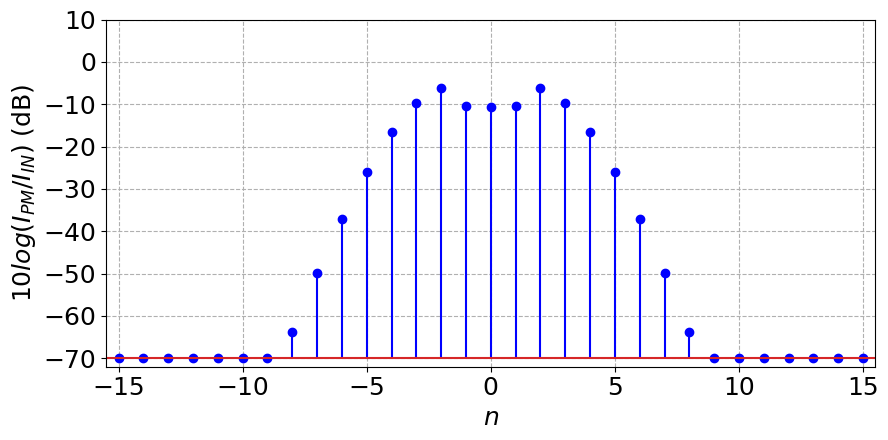

Amz1a and Amz1b 3.236613914990431 and 3.8912657985808217


In [ ]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector
ind3_pm = ind_n    # comprimento do vetor para usar no pm
A3pm   = 3.11 #4.68 #3.11
(vector3_pm) = pm_e_vector(ind3_pm, A3pm)

(ax_pm,comb_pm3,comb_pm_dBm3) = find_Iout_add_noise(up_n, vector3_pm, noise)
sistem1  = ' PM '
name_x   = 'n'
sup_pm  = 10
lat_pm  = 15
ploting_sl2(ax_pm, name_x, comb_pm_dBm3,sistem1, sup_pm, lat_pm)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

In [ ]:
# Pente do PM a ser analisado
vec_SL = comb_pm3  # Vetor de intensidade em mW
eN     = 5          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)

Tamanho do vector de saida do EOM : 45
eN = 5
SD = 0.07271
AV = 4.33586
CV = 49.39715


In [ ]:

v_ana = [1,1,1]
print('SD =', round(np.std(v_ana), 5))
  #Diferença entre mai e men (dB)
print('MD =', np.mean(v_ana))
print('CV =', round(100*np.std(v_ana)/np.mean(v_ana),5))

SD = 0.0
MD = 1.0
CV = 0.0
